In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

[1.020959654840458, 0.79662875354227425, 0.53997327720400301, 0.13271591514069744]


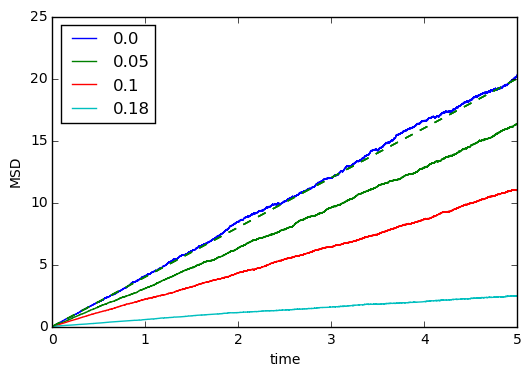

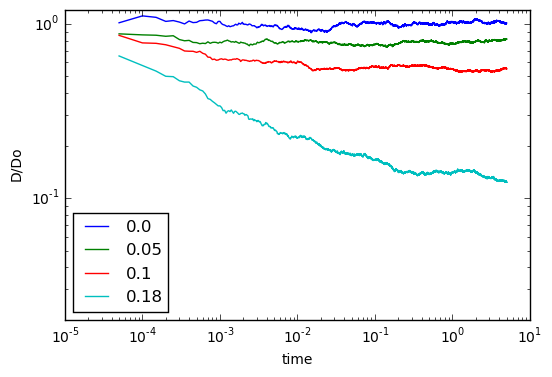

In [9]:
f1,ax1 = plt.subplots(1)
f2,ax2 = plt.subplots(1)

phis = [0.0,0.05,0.1,0.18]

def plotmsd(phi):
    dat = np.loadtxt('data/2Dcrowding_BD_phi'+str(phi)+'_run2.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    ax1.plot(t,msd,label=str(phi))
    D = 1.
    ax1.plot(t,4*D*t,'g--')
    Dt = msd[1:]/t[1:]/4./D
    ax2.loglog(t[1:],Dt,label=str(phi))
    deff = Dt[(t>1)[1::]]
    return np.mean(deff)

de = []
for p in phis:
    mean = plotmsd(p)
    de.append(mean)
    ax1.set_xlabel("time")
    ax1.set_ylabel("MSD")  
    ymin = 0.02
    ymax = 1.2
    ax2.set_ylim(ymin,ymax)
    #ax2.set_yticks(np.arange(ymin,ymax,0.1))
    ax2.set_xlabel("time")
    ax2.set_ylabel("D/Do")    
    ax1.legend(loc='best')
    ax2.legend(loc='best')  
print de

In [44]:
#f1.savefig("figure/2DBD_diffusion_MSD_t.png",format='png',dpi=100)    
#f2.savefig("figure/2DBD_diffusion_Deff_t.png",format='png',dpi=100)

In [10]:
print phis
print de

[0.0, 0.05, 0.1, 0.18]
[1.020959654840458, 0.79662875354227425, 0.53997327720400301, 0.13271591514069744]


[-4.80986378  1.02634708]
phi [0.0, 0.05, 0.1, 0.18]
Deff [1.020959654840458, 0.79662875354227425, 0.53997327720400301, 0.13271591514069744]


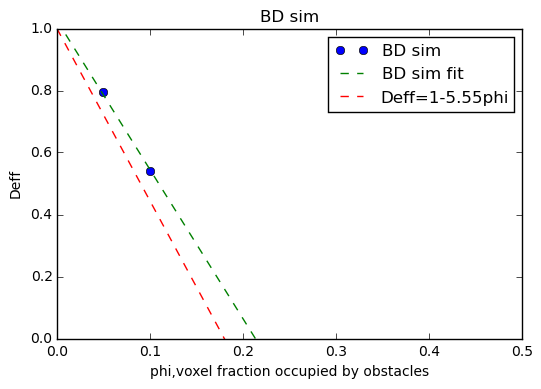

In [48]:
import scipy
from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

#de = [0.94830140592077317, 0.67515725372187418, 0.42724170618727503, 0.20667644039049163, 0.081817752936242369, 0.032423098951908771]
#phis = [0.0, 0.05, 0.1, 0.15, 0.18, 0.2]

def lin(x,m,c):
    return m*x+c 
c1,c2 = curve_fit(lin,phis[:-1],de[:-1])
plt.plot(phis[:-1],de[:-1],'o',label='BD sim')
xx = np.linspace(phis[0],0.25,10)
print c1
plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'--',label='BD sim fit')
plt.plot(xx,[(-1./0.18)*i+1. for i in xx],'--',label='Deff=1-5.55phi')
plt.title('BD sim')
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
plt.xlim(0,0.5)
plt.ylim(0.0,1)
plt.legend()
print 'phi',phis
print 'Deff',de
#print 'phic=',-1./slope
plt.savefig("figure/2DBD_diffusion_Deff_phi.png",format='png',dpi=100)
plt.show()

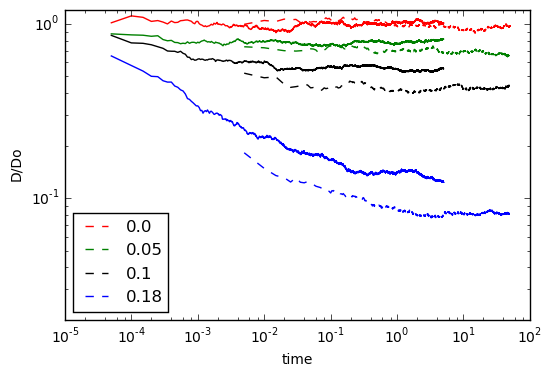

In [11]:
f2,ax2 = plt.subplots(1)

phis = [0.0,0.05,0.1,0.18]
def plotmsd1(phi):
    dat = np.loadtxt('data/2Dcrowding_BD_phi'+str(phi)+'_run1.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    D = 1
    Dt = msd[1:]/t[1:]/4./D
    ax2.loglog(t[1:],Dt,'--',color=c,label=str(phi))
    return 

def plotmsd2(phi):
    dat = np.loadtxt('data/2Dcrowding_BD_phi'+str(phi)+'_run2.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    D = 1
    Dt = msd[1:]/t[1:]/4./D
    ax2.loglog(t[1:],Dt,'-',color=c)
    return 

de = []
clrs = ['r','g','k','b']
for p,c in zip(phis,clrs):
    plotmsd1(p)
    plotmsd2(p)
    
ymin = 0.02
ymax = 1.2
ax2.set_ylim(ymin,ymax)
#ax2.set_yticks(np.arange(ymin,ymax,0.1))
ax2.set_xlabel("time")
ax2.set_ylabel("D/Do")    
ax2.legend(loc='best')  

# 